<a href="https://colab.research.google.com/github/ashika69/ML-Basics/blob/main/MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MULTI LINEAR REGRESIION**

        Here, the depended variable(output) depends on more than one independent variable and almost similar to simple linear regression.
   **Simple** ------->experience - salary
   
   **Multi**--------->R&D ,Admin, Marketing spend , state - Profit             

**STEP 1** -----> Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('50_Startups.csv')

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**STEP 2** -----> DATA PREPROCESSING

In [ ]:
dataset.isna().sum()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

Here, the data contains categorial variables that may effect on the model .Therefore, we encode categorial variables using
 **sklearn.compose - ColoumnTransfer and sklear.preprocessing - OneHotEncoder**

In [ ]:
from tables.table import Col
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encode' , OneHotEncoder() , [3])] , remainder = 'passthrough')
x = ct.fit_transform(x)

Here , in order to remove the dummy variable trap , we delete from cloumn from categorial variables

In [ ]:
x = x[: , :1] #avoid dummy variable

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 0)

**STEP 3** -------> MODEL FITTING

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit( x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

**STEP 4**  ---->  ACTUAL  **Vs**   PREDICTED

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

-0.11945094237596265

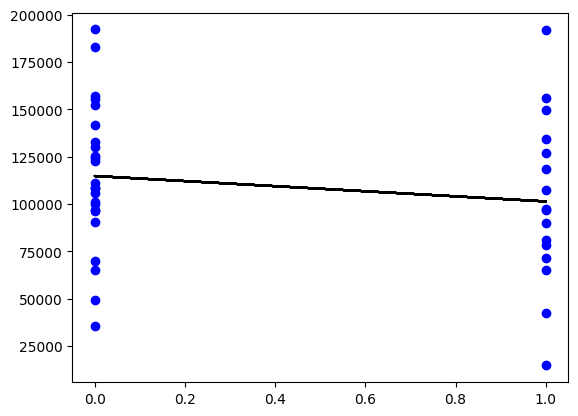

In [ ]:
plt.scatter(x_train,y_train , color = 'blue')
plt.plot(x_train , regressor.predict(x_train) , color = 'black')
plt.show()